# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 11
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family flew from Washing...
1,✅ Trip Verified | Easy check in a T5. Galleri...
2,"Not Verified | Flight delayed by an hour, it ..."
3,Not Verified | The staff are very rude and not...
4,✅ Trip Verified | Good domestic flight operat...


In [6]:
import os

# Create the 'data' directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")
df.to_csv("data/BA_reviews.csv")

Now we have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
print(df)

                                                reviews
0     ✅ Trip Verified |  My family flew from Washing...
1     ✅ Trip Verified |  Easy check in a T5. Galleri...
2     Not Verified |  Flight delayed by an hour, it ...
3     Not Verified | The staff are very rude and not...
4     ✅ Trip Verified |  Good domestic flight operat...
...                                                 ...
1095  ✅ Trip Verified |  London to Zurich. The airli...
1096  ✅ Trip Verified |  Glasgow to New York JFK via...
1097  ✅ Trip Verified |  Flew on a last minute emerg...
1098  ✅ Trip Verified |  Earlier this year, my wife ...
1099  Not Verified |  Los Angeles to London. I booke...

[1100 rows x 1 columns]


In [8]:
for index, row in df.iterrows():
    # Remove "✅ Trip Verified" from the review text
    cleaned_review = row["reviews"].replace("✅ Trip Verified", "").replace("Not Verified", "").strip()
    
    # Update the DataFrame with the cleaned review
    df.at[index, "reviews"] = cleaned_review

    
# Save the cleaned DataFrame to a new CSV file
df.to_csv("data/reviews_cleaned.csv", index=False)

In [9]:
print(df)


                                                reviews
0     |  My family flew from Washington to London on...
1     |  Easy check in a T5. Galleries south and Nor...
2     |  Flight delayed by an hour, it happens, no b...
3     | The staff are very rude and not trained prop...
4     |  Good domestic flight operated by BA Cityfly...
...                                                 ...
1095  |  London to Zurich. The airline isn’t bad. Th...
1096  |  Glasgow to New York JFK via London. Outgoin...
1097  |  Flew on a last minute emergency trip London...
1098  |  Earlier this year, my wife and I travelled ...
1099  |  Los Angeles to London. I booked with AA, LA...

[1100 rows x 1 columns]


In [61]:
pd.set_option('display.max_colwidth', None)
print(df.iloc[1])

reviews                   |  Easy check in a T5. Galleries south and North lounges packed, only just able to get a seat. Didn’t stay long as B gates lounge much quieter. Flight boarded smoothly and on time. A380 upper deck. Old club world seating which is beginning to age a little. However, like the large toilets on this aircraft type. Cabin crew were all fantastic. One family had tech issues with their seats and entertainment systems which crew worked hard on though sadly without success. Food and drink options were all very good. Entertainment was good. Overall an enjoyable flight.
Sentiment_Polarity                                                                                                                                                                                                                                                                                                                                                                                                       

In [10]:
import pandas as pd
from textblob import TextBlob


In [77]:
import pandas as pd
from textblob import TextBlob


def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity, sentiment.subjectivity

# Apply sentiment analysis and create new columns
df["Sentiment_Polarity"], df["Sentiment_Subjectivity"] = zip(*df["reviews"].apply(analyze_sentiment))
df["Sentiment_Label"] = df.apply(lambda row: "Positive" if (row["Sentiment_Polarity"] > 0 and row["Sentiment_Subjectivity"] > 0.5)
                                      else ("Negative" if (row["Sentiment_Polarity"] < 0 and row["Sentiment_Subjectivity"] > 0.5)
                                      else "Negative"), axis=1)  # Simplified to "Negative" for no "Neutral"

# Print the updated DataFrame

In [12]:
df["Sentiment_Label"] = df["Sentiment_Polarity"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))


In [78]:
print(df)

In [80]:
positive=df[df['Sentiment_Label' ]=="Positive"]
positive.shape[0]



333

In [81]:
negative=df[df['Sentiment_Label' ]=="Negative"]
negative.shape[0]

767

In [68]:
 print(positive)
positive_counts = positive.shape[0]
print(positive_counts)

In [82]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


negative_counts = negative.shape[0]
print(negative_counts)

767


## WordCloud Visualization for Positive Reviews

In this section, we will generate a WordCloud visualization to visualize the most frequent words in positive reviews using the `WordCloud` library. The WordCloud is a graphical representation of word frequency, where the size of each word corresponds to its frequency in the text. We will follow these steps:

1. **Combining Reviews:** We will combine all the positive reviews into a single text using the `.join()` method and the "reviews" column of the "positive" DataFrame.

2. **Creating a WordCloud Object:** We will create a `WordCloud` object using the `WordCloud` class from the `wordcloud` library. We can customize parameters such as `width`, `height`, and `background_color`.

3. **Generating WordCloud:** The `generate()` method of the `WordCloud` object will process the combined text and generate the WordCloud.

4. **Displaying the WordCloud:** We will use the `imshow()` function from the `matplotlib` library to display the WordCloud visualization. The `interpolation` parameter can be set for a smoother appearance. We will also turn off the axis using `plt.axis("off")`.

Let's proceed to visualize the WordCloud for positive reviews!


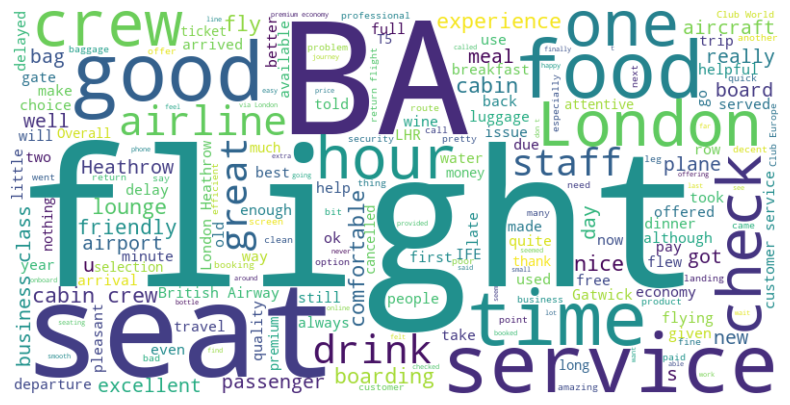

In [89]:
 # Combine positive reviews into a single text
positive_reviews_text = " ".join(positive["reviews"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word Frequency Analysis in Positive Reviews

In this section, we will analyze the word frequency in a collection of positive reviews using the Pandas library for data manipulation, the Counter class for counting word occurrences, and the wordcloud library for generating visualizations. We will perform the following steps:

1. **Data Preparation:** Assuming we have a DataFrame named "positive" with a "reviews" column, we will combine all the positive reviews into a single text.
2. **Preprocessing:** We will convert the text to lowercase and remove punctuation to standardize the data.
3. **Tokenization:** The text will be tokenized into individual words.
4. **Stopword Removal:** Common English stopwords (e.g., "and", "the", "is") will be removed from the tokenized words using the STOPWORDS set from the wordcloud library.
5. **Word Filtering:** Words with less than 4 characters will be filtered out.
6. **Word Counting:** The frequency of each word will be counted using the Counter class from the collections module.
7. **Visualization:** We will generate a line graph to visualize the most common words and their frequencies.

Let's get started!


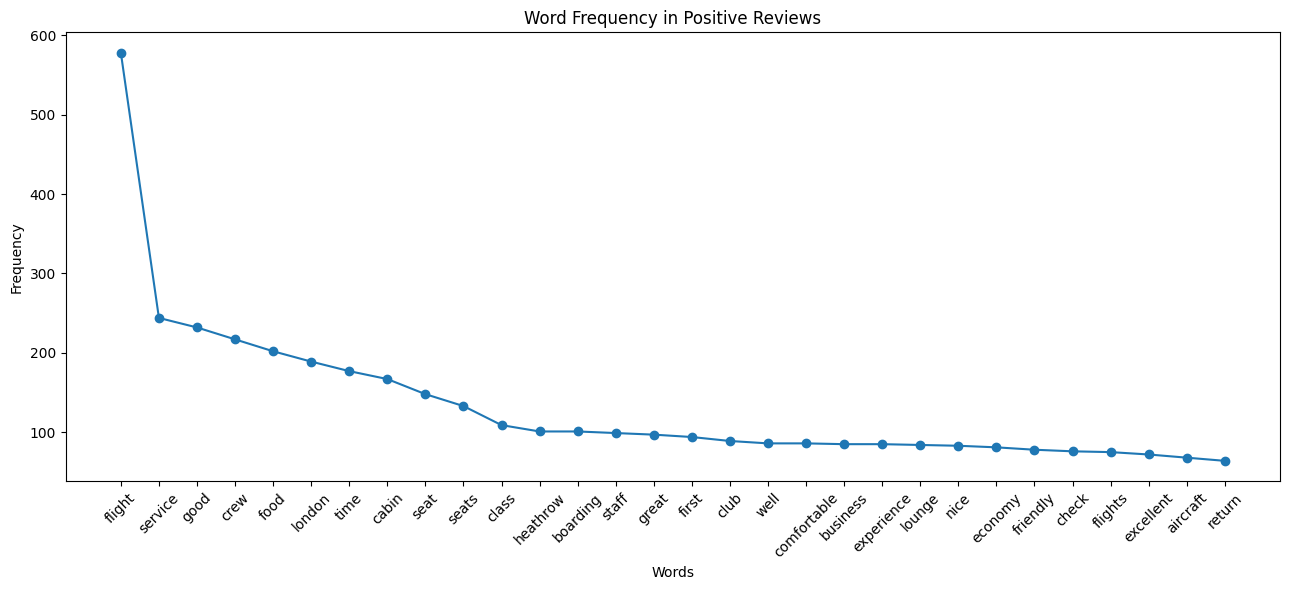

In [88]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "positive" with "reviews" column

# Combine positive reviews into a single text
positive_reviews_text = " ".join(positive["reviews"])

# Preprocessing: Convert to lowercase and remove punctuation
positive_reviews_text = positive_reviews_text.lower()
positive_reviews_text = positive_reviews_text.replace(".", "").replace(",", "")

# Tokenize the text into individual words
words = positive_reviews_text.split()

# Remove stopwords
filtered_words = [word for word in words if word not in STOPWORDS]

# Remove words with less than 4 characters
filtered_words = [word for word in filtered_words if len(word) >= 4]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(30)
word_names, word_frequencies = zip(*most_common_words)

# Create a line graph
plt.figure(figsize=(13, 6))
plt.plot(word_names, word_frequencies, marker='o')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency in Positive Reviews")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Word Frequency Analysis in Negative Reviews

In this section, we will perform a word frequency analysis for negative reviews. We'll use the Pandas library for data manipulation, the Counter class for counting word occurrences, and the wordcloud library's STOPWORDS set to remove common English stopwords. We will follow these steps:

1. **Combining Reviews:** We will combine all the negative reviews into a single text using the `.join()` method and the "reviews" column of the "negative" DataFrame.

2. **Preprocessing:** Similar to the positive reviews analysis, we will convert the text to lowercase and remove punctuation.

3. **Tokenization:** The text will be tokenized into individual words.

4. **Stopword Removal:** Common English stopwords (e.g., "and", "the", "is") will be removed from the tokenized words using the STOPWORDS set from the wordcloud library.

5. **Word Filtering:** We'll filter out words with less than 4 characters.

6. **Word Counting:** The frequency of each word will be counted using the Counter class from the collections module.

7. **Visualization:** We will generate a line graph to visualize the most common words and their frequencies.

The code and process are similar to the word frequency analysis for positive reviews, with the difference being that we are analyzing negative reviews. Let's proceed to visualize the Word Frequency in Negative Reviews!


In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


negative_reviews_text = " ".join(negative["reviews"])

# Preprocessing: Convert to lowercase and remove punctuation
negative_reviews_text = negative_reviews_text.lower()
negative_reviews_text = negative_reviews_text.replace(".", "").replace(",", "")

# Tokenize the text into individual words
words = negative_reviews_text.split()

# Remove stopwords
filtered_words = [word for word in words if word not in STOPWORDS]

# Remove words with less than 4 characters
filtered_words = [word for word in filtered_words if len(word) >= 4]


# Count the frequency of each word
word_freq = Counter(filtered_words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(30)
word_names, word_frequencies = zip(*most_common_words)

# Create a line graph
plt.figure(figsize=(13, 6))
plt.plot(word_names, word_frequencies, marker='o')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency in Negative Reviews")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
 

In [ ]:
plt.show()

In [91]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Assuming you have DataFrames named "positive" and "negative" with "reviews" columns
# positive = ...
# negative = ...

# Combine positive reviews into a single text
positive_reviews_text = " ".join(positive["reviews"])

# Combine negative reviews into a single text
negative_reviews_text = " ".join(negative["reviews"])

# Preprocessing: Convert to lowercase and remove punctuation
positive_reviews_text = positive_reviews_text.lower()
positive_reviews_text = positive_reviews_text.replace(".", "").replace(",", "")

negative_reviews_text = negative_reviews_text.lower()
negative_reviews_text = negative_reviews_text.replace(".", "").replace(",", "")

# Tokenize the text into individual words for positive and negative reviews
positive_words = positive_reviews_text.split()
negative_words = negative_reviews_text.split()

# Remove stopwords for positive and negative reviews
filtered_positive_words = [word for word in positive_words if word not in STOPWORDS]
filtered_negative_words = [word for word in negative_words if word not in STOPWORDS]

# Remove words with less than 4 characters for positive and negative reviews
filtered_positive_words = [word for word in filtered_positive_words if len(word) >= 4]
filtered_negative_words = [word for word in filtered_negative_words if len(word) >= 4]

# Count the frequency of words for positive and negative reviews
positive_word_freq = Counter(filtered_positive_words)
negative_word_freq = Counter(filtered_negative_words)

# Get the most common words and their frequencies for positive and negative reviews
positive_most_common_words = positive_word_freq.most_common(30)
negative_most_common_words = negative_word_freq.most_common(30)

# Compare the counts of each word in positive and negative reviews
for word, positive_count in positive_most_common_words:
    negative_count = negative_word_freq[word]
    print(f"Word: {word} | Positive Count: {positive_count} | Negative Count: {negative_count}")

# You can further analyze and visualize the comparison as needed

Word: flight | Positive Count: 578 | Negative Count: 1378
Word: service | Positive Count: 244 | Negative Count: 544
Word: good | Positive Count: 232 | Negative Count: 236
Word: crew | Positive Count: 217 | Negative Count: 292
Word: food | Positive Count: 202 | Negative Count: 324
Word: london | Positive Count: 189 | Negative Count: 474
Word: time | Positive Count: 177 | Negative Count: 337
Word: cabin | Positive Count: 167 | Negative Count: 252
Word: seat | Positive Count: 148 | Negative Count: 420
Word: seats | Positive Count: 133 | Negative Count: 326
Word: class | Positive Count: 109 | Negative Count: 344
Word: heathrow | Positive Count: 101 | Negative Count: 258
Word: boarding | Positive Count: 101 | Negative Count: 176
Word: staff | Positive Count: 99 | Negative Count: 339
Word: great | Positive Count: 97 | Negative Count: 69
Word: first | Positive Count: 94 | Negative Count: 190
Word: club | Positive Count: 89 | Negative Count: 141
Word: well | Positive Count: 86 | Negative Count

## Word Frequency Analysis in Positive and Negative Reviews

In this section, we will analyze and visualize the word frequency in both positive and negative reviews. We'll use the Pandas library for data manipulation, the Counter class for counting word occurrences, and the wordcloud library's STOPWORDS set to remove common English stopwords. We will follow these steps:

1. **Combining Reviews:** We will combine all the positive and negative reviews into separate texts using the `.join()` method and the "reviews" columns of the "positive" and "negative" DataFrames.

2. **Preprocessing:** Similar to the previous analyses, we will convert the text to lowercase and remove punctuation.

3. **Tokenization:** The text will be tokenized into individual words for both positive and negative reviews.

4. **Stopword Removal:** We'll remove common English stopwords using the STOPWORDS set from the wordcloud library for both sets of words.

5. **Word Filtering:** We'll filter out words with less than 4 characters for both sets of words.

6. **Word Counting:** The frequency of each word will be counted using the Counter class from the collections module for both sets of words.

7. **Visualization:** We will generate a combined line graph to visualize the most common words and their frequencies in both positive and negative reviews.

   - The blue line represents positive words, and the red line represents negative words.
   - The x-axis represents the words, and the y-axis represents the frequency.

8. **Annotation:** We'll annotate each point on the graph with the corresponding word label for better readability.

Let's proceed to visualize the Word Frequency in both Positive and Negative Reviews!


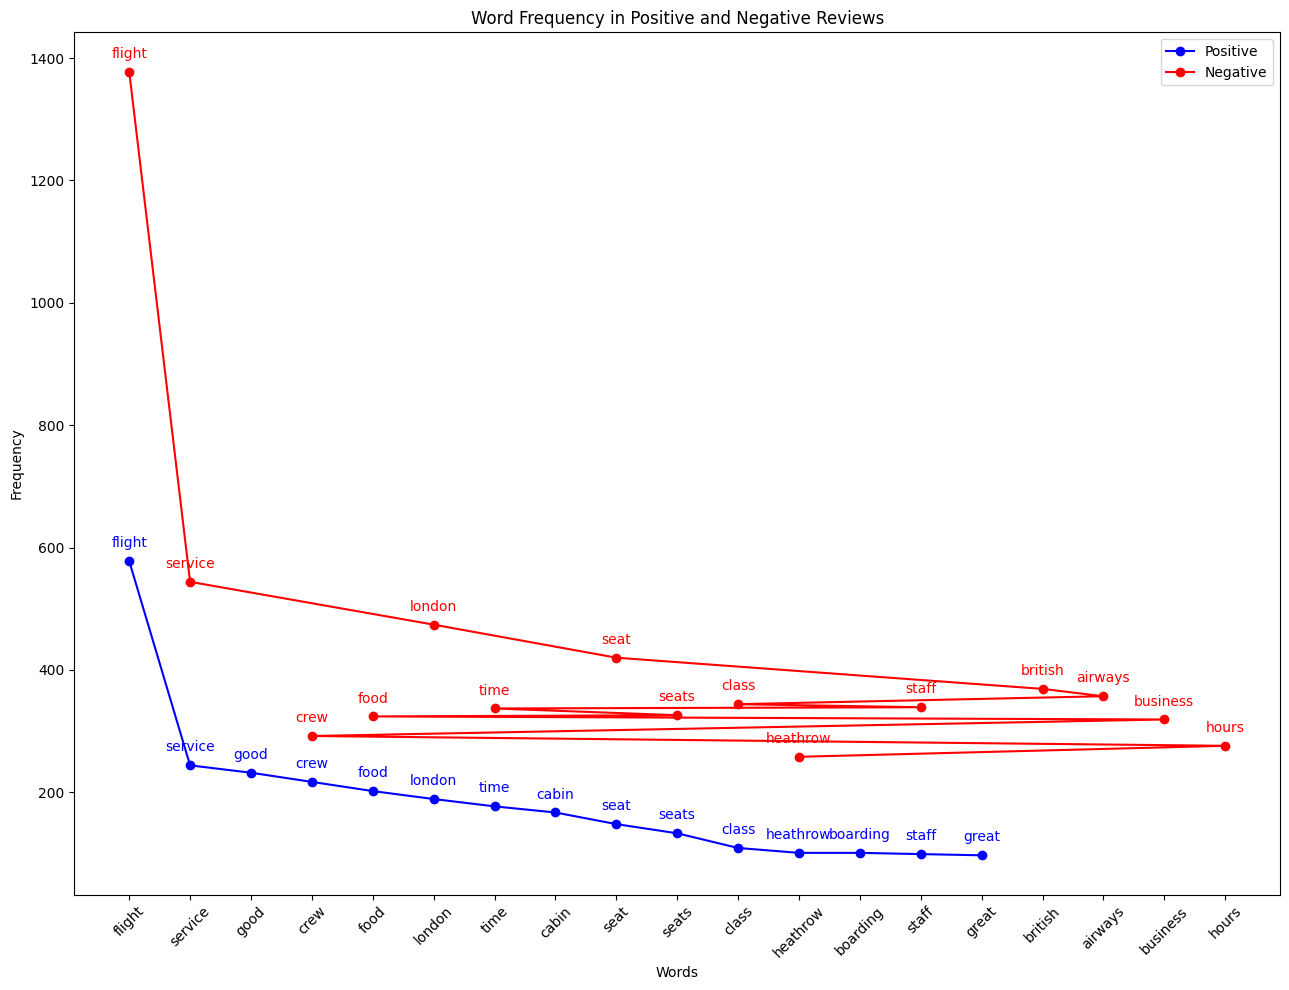

In [94]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Assuming you have DataFrames named "positive" and "negative" with "reviews" columns

# Combine positive reviews into a single text
positive_reviews_text = " ".join(positive["reviews"])

# Preprocessing: Convert to lowercase and remove punctuation
positive_reviews_text = positive_reviews_text.lower()
positive_reviews_text = positive_reviews_text.replace(".", "").replace(",", "")

# Tokenize the text into individual words
positive_words = positive_reviews_text.split()

# Remove stopwords
filtered_positive_words = [word for word in positive_words if word not in STOPWORDS]

# Remove words with less than 4 characters
filtered_positive_words = [word for word in filtered_positive_words if len(word) >= 4]

# Count the frequency of each positive word
positive_word_freq = Counter(filtered_positive_words)

# Get the most common positive words and their frequencies
most_common_positive_words = positive_word_freq.most_common(15)
positive_word_names, positive_word_frequencies = zip(*most_common_positive_words)

# Combine negative reviews into a single text
negative_reviews_text = " ".join(negative["reviews"])

# Preprocessing: Convert to lowercase and remove punctuation
negative_reviews_text = negative_reviews_text.lower()
negative_reviews_text = negative_reviews_text.replace(".", "").replace(",", "")

# Tokenize the text into individual words
negative_words = negative_reviews_text.split()

# Remove stopwords
filtered_negative_words = [word for word in negative_words if word not in STOPWORDS]

# Remove words with less than 4 characters
filtered_negative_words = [word for word in filtered_negative_words if len(word) >= 4]

# Count the frequency of each negative word
negative_word_freq = Counter(filtered_negative_words)

# Get the most common negative words and their frequencies
most_common_negative_words = negative_word_freq.most_common(15)
negative_word_names, negative_word_frequencies = zip(*most_common_negative_words)

# Create a line graph
plt.figure(figsize=(13, 10))
plt.plot(positive_word_names, positive_word_frequencies, marker='o', label="Positive", color='blue')
plt.plot(negative_word_names, negative_word_frequencies, marker='o', label="Negative", color='red')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency in Positive and Negative Reviews")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Annotate points with word labels
for x, y, word in zip(positive_word_names, positive_word_frequencies, positive_word_names):
    plt.annotate(word, (x, y), textcoords="offset points", xytext=(0, 10), ha="center", color='blue')

for x, y, word in zip(negative_word_names, negative_word_frequencies, negative_word_names):
    plt.annotate(word, (x, y), textcoords="offset points", xytext=(0, 10), ha="center", color='red')

plt.show()
